Here we will be creating a CNN ( Convolutional Neural Network ) to read handwritten digits ( From 0 to 9 ) and we also check it's accuracy as we go further.

1. Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , MaxPooling2D , Conv2D , Flatten

2. loading the **MNIST ( Modified National Institute of Standards and Technology ) Database** found in keras library

In [12]:
(x_train , y_train) , (x_test , y_test ) = mnist.load_data() 

3. Checking the shape and size of the database ( 60000:10000 ( train:test ) of 28X28 images ).

In [13]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [14]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


4. Showing a random entity and its output data.

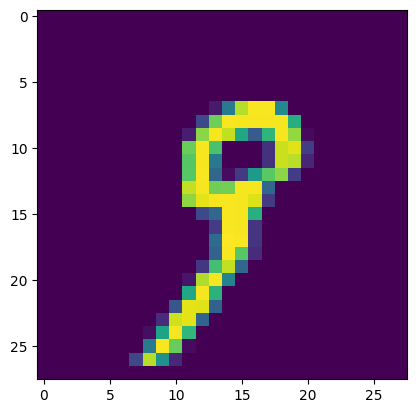

In [15]:
plt.imshow(x_train[19])

In [16]:
y_train[19]

9

5. Since the array of input data have values from 0 to 255 , we are dividing the input data by 255 to Normalise it making it more convienient to read as the new range will be 0 to 1.

In [17]:
x_test = x_test/255
x_train = x_train/255

6. Here we are creating a Simple CNN using Sequential model. We are adding a Convolutional layer ( Conv2D ), a Pooling layer ( MaxPooling2D ), a Flattening layer to flatten the array followed by 2 dense layers.

In [18]:
model = Sequential()

model.add(Conv2D( filters = 64 , kernel_size = (3,3) , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())
model.add(Dense(100 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'softmax'))


model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 93s 48ms/step - loss: 0.1882 - accuracy: 0.9493
Epoch 2/7
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0573 - accuracy: 0.9839
Epoch 3/7
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0360 - accuracy: 0.9898
Epoch 4/7
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0238 - accuracy: 0.9937
Epoch 5/7
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 6/7
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0102 - accuracy: 0.9977
Epoch 7/7
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0067 - accuracy: 0.9986


7. As we can see our model has achieved 99.86% accuracy after 7 rounds of data runs.Now let's have a look at the model Summary.

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1081700   
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
____________________________________________

9. Our Model have got an accuracy of 98.62% in while pridicting the testing set.

In [44]:
y_pred = model.predict(x_test)
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0414 - accuracy: 0.9862


[0.041361115872859955, 0.9861999750137329]

Y_pred is actualy a 2D array where each column have 10 values each showing the value of similarity with the position value of the input image array.

In [45]:
y_pred

array([[1.4370185e-07, 5.4543051e-07, 1.1302208e-06, ..., 9.9993753e-01,
        2.4068794e-07, 6.3559010e-06],
       [6.3011030e-06, 2.1422738e-05, 9.9996269e-01, ..., 1.4256906e-09,
        3.8380877e-06, 2.2179182e-07],
       [6.5546324e-08, 9.9994421e-01, 8.6003490e-07, ..., 1.7935320e-06,
        4.5228840e-06, 2.2328551e-08],
       ...,
       [5.0469552e-11, 2.3991325e-07, 8.0992690e-10, ..., 3.6145585e-07,
        7.3666138e-07, 1.3939292e-06],
       [3.2680290e-08, 6.0889136e-07, 2.5755220e-09, ..., 5.5622444e-08,
        2.0102876e-04, 2.4860444e-07],
       [2.4076366e-08, 5.2145026e-09, 7.3382743e-08, ..., 1.4870955e-11,
        2.7385002e-07, 1.9284740e-09]], dtype=float32)

10. Sample Testing.

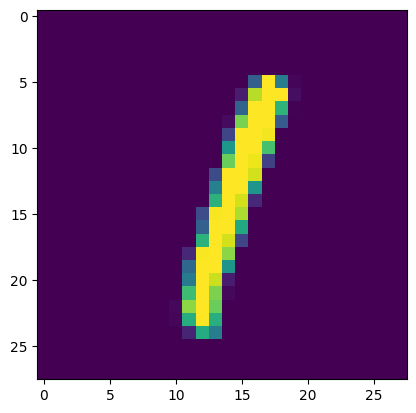

In [41]:
plt.imshow(x_test[5])

y_pred_label only contain the index of max value of each column of y_pred hence giving the most similar digit to the handwritten image data

In [40]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[5]

1

11. Plotting the Confusion matrix of the Model. 

[Text(0.5, 47.7222222222222, ' Predicted Output '),
 Text(95.72222222222221, 0.5, ' Actual Output ')]

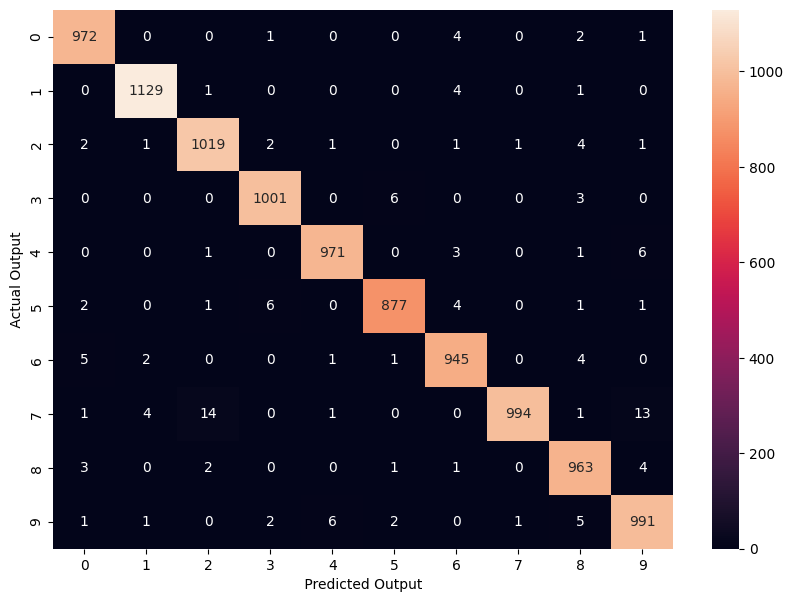

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_label)
plt.figure(figsize=(10,7))
sns.heatmap( cm, annot = True ,fmt = 'd' ).set( xlabel = ' Predicted Output ' , ylabel = ' Actual Output ' )

## **THANKS FOR WATCHING :)**